# Day 7

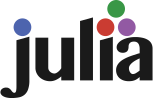

"Julia v1.5.2."

In [1]:
download("https://nextjournal.com/data/QmUCNnw1PVdYnj6eNQdRs6nwkM9V75RKxADqCoUH7WFUUr?filename=Julia_Programming_Language_Logo.svg&content-type=image/svg%2Bxml", "/results/logo.svg")
"Julia v$VERSION."

In [1]:
example = """32T3K 765
T55J5 684
KK677 28
KTJJT 220
QQQJA 483"""

"32T3K 765\nT55J5 684\nKK677 28\nKTJJT 220\nQQQJA 483"

In [1]:
# solution 1
function scoreHand(hand)
  theCount = sort(map(c -> count(i -> i==c, hand), unique(hand)), rev=true)
  if theCount[1] == 5
    7
  elseif theCount[1] == 4
    6
  elseif theCount[1] == 3 && theCount[2] == 2
    5
  elseif theCount[1] == 3
    4
  elseif theCount[1] == 2 && theCount[2] == 2
    3
  elseif theCount[1] == 2
    2
    else 
    1
  end
end

function maptoInt(c)
  if c == 'T'
    10
  elseif c == 'J'
    11
  elseif c=='Q'
    12
  elseif c=='K'
    13
  elseif c=='A'
    14
  else
    parse(Int, c)
  end    
end

scoreHand

In [1]:
 function recCompareCard(a,b, f)
  if compareCards(a,b)
    true
  elseif compareCards(b,a)
    false
  else
    f
  end
end  

function compareCards(a,b)
  maptoInt(a) < maptoInt(b)
end

compareCards

In [1]:
# the lt keyword allows providing a custom "less than" function (note that for every x and y, only one of lt(x,y) and lt(y,x) can return true
function compareHands(x,y)
  sx = scoreHand(x)
  sy = scoreHand(y)
  if sx < sy
    true
  elseif sx > sy
    false
  else
    compareHandsEqualRankslt(x,y)
  end
end

function compareHandsEqualRankslt(x,y)
  recCompareCard(x[1], y[1], 
    recCompareCard(x[2], y[2], 
      recCompareCard(x[3], y[3], 
        recCompareCard(x[4], y[4], 
          recCompareCard(x[5], y[5], false
          )
        )
      )
    )
  )
  end

compareHandsEqualRankslt

In [1]:
function solution1(input)
  lines = split(input, "\n")
  handsBids = map(l -> map(String,split(l, " ")), lines)
  totalScore = 0
  sorted = sort(handsBids, by=x -> x[1], lt=compareHands)
  println(sorted)
  for (rank, handbid) in enumerate(sorted)
    totalScore += rank * parse(Int, handbid[2])
  end
  totalScore
end

solution1

In [1]:
solution1(example)

5905

In [1]:
solution1(puzzleInput)

252127335

In [1]:
#DEBUG
println(sort(map(c -> count(i -> i==c, "T55J5"), filter(i -> i != 'J', unique("T55J5"))), rev=true))

In [1]:
# pour la solution2, on redéfinit scoreHand & maptoInt
function scoreHand(hand)  
  jCount = count(i -> i=='J', hand)
  if jCount == 5
    8
  else
    theCount = sort(map(c -> count(i -> i==c, hand), filter(i -> i != 'J', unique(hand))), rev=true) 
    push!(theCount, 0, 0)
    if theCount[1] == 5
      8
      elseif theCount[1] == 4
      6 + (jCount * 2)
      elseif theCount[1] == 3 && theCount[2] == 2
      5
      elseif theCount[1] == 3
      4 + (jCount * 2)
      elseif theCount[1] == 2 && theCount[2] == 2
      3 + (jCount * 2)
      elseif theCount[1] == 2
      2 + (jCount * 2)
      else 
      jCount * 2
    end
  end
end

function maptoInt(c)
  if c == 'T'
    10
  elseif c == 'J'
    0
  elseif c=='Q'
    12
  elseif c=='K'
    13
  elseif c=='A'
    14
  else
    parse(Int, c)
  end    
end

maptoInt

In [1]:
puzzleInput = """AJ44J 454
33848 56
66366 699
KQKJK 718
47767 78
T723K 40
JQAKT 799
3JQ34 871
54622 625
34634 602
7K784 909
T4T4T 379
QQQQJ 387
J2J79 991
8AT8T 310
55KKK 705
88JQQ 949
83Q52 74
J7J7T 272
973JK 832
A5555 520
Q868Q 918
Q3AQ7 843
K73KJ 87
TK5KK 595
TAAAK 102
2AQTT 882
TJ5T5 889
TT23T 356
A9749 248
39TJ9 585
K6242 312
444K4 627
5J55Q 279
6K6T6 381
KAJ36 105
7J388 902
444QQ 150
7A7Q7 953
57333 331
AATAA 580
575J5 393
52545 910
629KJ 749
47A74 643
J9JJ9 435
2K2K9 189
J33J2 600
Q2926 598
Q67TA 858
A8533 193
6Q6KQ 363
54444 925
7327K 552
4A3K8 833
JKTQ2 790
477Q7 358
66A6T 204
44924 337
4J262 807
JJ366 676
56555 60
97J77 130
8Q4KQ 729
852Q5 934
9KT48 133
29TQ4 565
Q47T2 399
9J944 398
2Q792 795
7K897 804
577J7 525
5QQ5J 495
QQQ92 913
22272 291
8Q8Q8 16
3KKK9 258
Q47A7 586
76777 427
T8J34 874
Q5999 782
JJ29T 173
88837 241
22662 300
44K72 196
JAAQ6 229
94J9Q 690
T477T 845
3T82J 433
43424 865
63668 821
T2T2T 472
8A66Q 835
4KKJ7 952
T4TTQ 584
77989 257
37JA7 148
78944 717
7AJ6Q 851
6KJQ2 122
386A3 53
87777 416
KKJJT 480
4639J 846
9T473 695
88K8J 632
443A4 928
79767 611
84448 680
Q258T 748
TKTTT 249
KKK4K 893
36655 653
6QAJJ 185
5JA3Q 255
TTJTT 190
37QKK 432
8Q322 691
J7724 548
4T4TJ 121
23559 134
TT999 385
J2J94 765
AA5A5 593
33J35 683
J858Q 754
99259 798
TT45K 499
KKKJ7 415
2A59T 411
K474Q 607
AQ7T2 559
683KT 323
Q2T2Q 147
33442 299
K999K 83
9Q2J2 988
2J727 658
K544J 523
Q286T 954
Q8K5J 794
38AA3 1000
A7777 360
7QK77 808
22226 671
A6Q83 240
KK6J6 225
KKK33 776
3JK33 52
5T5A9 933
2A85J 45
5TTT5 932
467Q4 430
A76AT 886
8KKKK 597
9JJKA 389
5K555 202
39QQ9 604
2A25A 487
22Q42 43
3333K 269
T82TA 135
6JAK6 741
72Q2Q 582
QJ49K 722
89J6A 761
TJKA8 517
7979A 309
4KQK2 278
A5T3T 519
A4T2Q 167
8645A 726
T8T8T 29
4J4JQ 512
KJQJQ 661
4AA44 30
6A666 752
5AA92 969
Q9QJQ 891
674QA 549
93Q34 96
5QQQQ 191
8A8A4 662
2AQQQ 986
66JJ6 445
585J5 99
TQKKT 448
TTTJJ 569
T8T96 620
28622 431
K9365 697
QK4K4 20
TJJJT 887
59999 453
JKAAA 324
7774K 364
J5J2K 345
7474J 938
58QJ4 496
34434 235
55J5J 853
Q66AQ 205
3Q434 188
Q43QJ 879
KK3KA 974
5A5Q5 811
QQAQQ 818
666QA 371
55Q55 290
T8JJ3 989
69T32 10
246Q3 276
KAJA5 88
9JJ32 641
T8TTT 84
333JQ 372
KKKK2 442
3AAJ9 735
22K2K 572
77377 209
2Q683 684
75562 380
449A8 171
4T5J4 386
J8JJJ 929
443T4 115
AAQ74 461
2272J 212
576A8 757
64KA7 665
A4845 815
JTA68 316
TQAJ6 922
88J4Q 463
QQ442 305
3JJ33 119
TTAJJ 75
22TT2 714
T55KT 672
K23AQ 5
552J5 198
4A2J7 73
TA89A 787
A3K5K 82
74Q53 545
T7694 959
A6JJ6 476
AAAA6 353
AJ9T6 923
793J7 319
29K46 860
26494 464
64654 743
88877 265
4AJA6 473
77K87 981
6QAJ3 994
9T224 737
77577 446
T5QKJ 344
4547J 840
222J3 101
6Q666 468
KAT25 315
97898 616
22443 114
63366 280
89955 426
32333 963
A3A43 311
A3A3J 899
777J7 702
9Q8K8 266
33J39 156
Q3KKJ 820
8J53T 971
J455K 890
88AAA 727
555JT 677
K88KK 253
T2A82 977
J65JT 775
5852J 459
77585 716
Q43K5 970
JQATQ 37
J9928 3
445T4 812
24242 961
66868 878
9A4QK 26
444T6 285
23438 317
T3563 111
8T85K 72
AQJJ2 848
T3887 65
J4729 162
2J422 687
66266 187
75577 304
9562T 542
7T5T4 136
7AKKK 655
K2357 200
T2A25 915
84666 250
73338 439
66699 262
KT7T7 199
JJ325 751
222AT 103
T8TT2 738
8858A 182
2J842 314
42TQJ 57
7QQ33 141
4449T 785
35998 436
K236A 184
887J7 286
5A972 139
266A6 674
3ATK7 861
T76AT 340
4AT44 721
5J225 455
382Q9 68
QT9K2 298
29979 259
KA66A 896
T5TAT 888
K94T4 404
54KT6 254
2878T 599
AAA4A 366
A47A7 227
J4242 100
33QA9 62
99799 995
55437 228
AQAAA 382
KAKKA 79
44344 71
72627 652
TTTAT 231
666AA 438
TJTKJ 405
Q2TJT 962
65A88 281
J5Q75 931
22444 852
3JKJK 38
KQKQK 872
6Q4Q8 339
444QJ 85
QJ545 732
95KKK 646
88878 284
4A7J4 470
9A39A 127
892QJ 203
47748 332
Q79QQ 425
37Q33 803
7K4T2 828
QQQ4Q 719
KKKAK 973
2JJ66 54
48884 69
88J6J 917
9K9KK 532
TAJJ3 758
7K9KK 651
J6Q2J 956
AA388 725
62J72 826
24222 965
69699 274
767KK 175
9A67J 779
26K55 329
K4K94 107
49444 696
A6T8K 685
872J8 908
49845 628
34473 578
25673 334
3A3A5 287
7TTTT 335
9K32T 403
Q3A3Q 330
T4QA5 306
QTTK9 784
989J9 6
TTT77 159
A9Q46 490
9Q442 177
JAAAJ 789
444J4 407
35555 244
AAAA5 842
T55T5 308
KKTKT 113
5335J 186
58J58 296
Q7TJT 536
T232J 951
JKKJA 245
52AK6 619
63336 21
7K777 759
4T9KK 58
2552T 375
2AQT3 48
J9AAJ 516
46665 645
KT84Q 575
88K4J 946
QQJTT 854
99J9J 489
99659 966
5Q9T8 347
QJ5J9 936
59JTT 774
K5J95 326
A2ATK 95
JK7K7 715
AJAA4 613
T754A 926
7A728 979
93T7Q 704
QJ2K7 70
97799 633
5599Q 920
T773T 144
7J738 154
46464 834
959QQ 424
56AA6 31
Q5684 822
8A688 35
4J436 670
38K33 531
888JA 118
3T35T 201
7626T 384
J8888 689
2QATA 160
KKKJJ 814
428J8 753
TQ9JT 740
TA9T9 338
87A8A 660
34493 647
9J485 788
56T7Q 322
QJQ7Q 631
44464 421
99K2J 935
759QT 810
KT6QQ 503
9KAA9 883
97K8T 77
72288 396
29TJ3 608
7Q977 452
K36J8 343
T9T22 443
K7JT3 98
3A9TJ 400
AJAAA 251
TTTT3 709
AA2A2 544
6586Q 178
25222 805
Q9J75 881
A4394 484
77T79 264
4J4J4 862
7JJAJ 469
4446J 44
252Q2 763
AA88J 420
T4T2T 491
KQQKQ 447
63888 140
93493 213
77977 998
53J9K 367
J2324 864
92954 374
47J44 283
98QJ8 493
9AQ39 558
A4AA4 391
98988 797
8QTJ6 836
33766 560
T6AT6 780
96J66 824
2T4KA 829
A22JK 429
K3599 104
J9Q96 143
Q82Q9 964
77474 179
Q4K9K 711
4A49T 320
QA669 700
22333 999
3K97Q 537
QA889 857
595TT 792
J77T7 601
K5587 945
A7JAA 223
T7277 868
6TTT9 673
AAA42 997
KKKQK 295
K4QQK 22
74562 55
77252 796
458Q9 747
77477 233
T3TT3 667
888A9 650
5QQJA 744
7A576 24
J25T9 89
8K884 9
65565 562
47QQQ 639
A4768 914
3J9A4 554
39T82 46
9AK43 522
K8K68 590
Q2487 501
Q8J87 968
22A22 606
99KKQ 543
33533 535
99J9Q 294
J262J 760
89327 976
7Q677 164
ATTT6 678
7J78J 267
KJKK2 462
K522Q 762
44AAK 827
7A7TA 482
Q9JA9 692
4K9J4 369
5A424 211
K2782 34
9KAKJ 273
3K3JK 378
85T37 215
AAA37 475
Q777Q 394
8383A 773
J66J8 960
T29AQ 905
JQ487 642
47444 636
2AAJ5 876
86886 195
58525 221
AK9TK 993
JKKKK 242
97JJ9 239
77939 252
T55AK 947
73337 941
6423K 47
49762 944
A458K 541
4T755 450
7TK48 138
22223 583
TKTTK 629
5K5K5 577
2A272 768
Q47TA 819
62AKA 734
K66QK 823
8998K 120
22992 880
85TTT 596
9TA5K 710
4K276 856
98K88 297
K8888 921
32622 414
KKK44 987
K7J38 958
JJ32J 524
JKKK8 18
QA5J4 232
936QA 863
55522 733
K7A76 479
447KJ 515
66696 813
89888 957
99Q33 478
5A264 449
55A64 97
83388 978
J5555 86
7555T 781
46JT8 206
J4448 859
4J777 388
55955 208
T99AA 793
2835A 869
6559J 617
QQQQ3 157
Q3AAA 919
6T73A 63
49KKA 333
6A92T 528
48J24 373
QQJ8Q 256
3QQ7Q 707
7QQQQ 11
42T79 126
35434 477
9QQ99 712
5K2QQ 603
595T5 110
QT6TQ 618
Q6Q76 570
J8979 219
TT66T 207
2T682 131
JQQQJ 992
QJ44Q 940
Q473Q 28
QQQ99 588
37768 197
QKKKT 328
77J99 589
93999 563
A77AA 362
KK7K6 996
22255 579
94944 730
3495T 897
QTTQT 539
96AJ9 529
A2224 703
62659 377
7KTJT 486
T786Q 573
6JA6A 214
KAA9J 50
4488T 538
T2T88 485
22Q2Q 67
3K7K8 605
75JQ7 498
3T3J5 288
8679T 27
7TQ52 483
QQ87A 365
QKKKA 392
JK99K 505
JQQQ3 825
K4Q49 155
J76Q8 770
TJ8J5 94
3433T 982
34AA4 506
72877 137
42836 801
JQQQT 440
59955 688
8K48K 855
Q8KA5 756
974JJ 675
53545 530
56844 783
333J3 441
93JQ6 767
5TTTT 318
257T9 533
QA6A6 8
8A298 937
29KT8 870
A8A8K 955
33QT3 841
5QKJ7 939
K2568 183
A9JJ9 720
JA8AA 948
9A989 180
88J8J 236
8TT55 571
ATATA 527
4K266 451
Q6644 701
44KK4 850
86863 830
5QT36 930
A4A6A 346
K3KTT 36
29JJ2 351
AJKQJ 307
3975K 166
T3K3J 844
A334J 806
5K348 885
4A2Q4 875
666T6 566
A7Q9A 419
A948Q 630
TJ222 666
KTKJ5 907
3343J 849
77282 169
9J99K 975
T8444 634
9KJTK 510
54449 124
2857T 418
J8T88 508
KKKK3 243
6425J 728
K3TQQ 152
6666J 390
59599 906
576J8 739
8838J 903
6Q6QQ 194
KQ366 23
QQ38Q 927
3KJ38 151
33Q9J 866
8884A 507
J8K23 513
A82Q7 370
2Q424 990
73Q5J 224
5JQJA 123
845Q8 912
7893A 376
J7847 838
KK442 594
Q2K9A 397
QQJ4Q 694
44J3J 624
72A34 444
59678 663
88T88 341
7AJ33 234
K5J5J 321
T94TQ 13
49Q5K 547
44T24 967
9629K 128
69T88 980
6T36T 576
252K2 168
29797 492
9372J 474
T8AAA 325
89TT8 402
JJT78 904
KAJ46 567
9TT49 521
K9599 59
28222 361
7895A 357
95A59 90
4888J 91
Q9J3T 230
72777 268
62A57 327
JJJJJ 406
7TJ43 984
47944 237
93396 222
554KK 706
574K7 574
6AT86 129
J2T2T 467
888Q8 437
QQTQQ 755
KKK5K 466
J9KJK 80
KJ2K9 557
K5KK2 422
5J434 681
99J99 19
54779 293
48K76 226
33343 561
5T787 149
Q942K 401
858J8 911
9KTQ9 410
KT3K2 943
29T98 731
7KKK7 898
A6K66 772
78273 277
777Q7 693
2J2J2 354
JAK97 4
6T64T 713
T65Q2 174
J2T2Q 270
48348 481
5J66A 153
56828 109
JQ457 540
6Q6Q6 12
68J86 146
7433J 41
QA6A8 657
TT2TT 336
K89Q6 555
A7T38 591
8A562 383
TT7T4 546
J4443 117
6J636 142
4KJ4J 686
27767 494
A99J9 301
KQQJ5 750
8TA88 839
72277 15
TA568 7
25QT4 564
AJ4J3 2
A33K3 644
T3QK6 847
375AJ 172
799J9 640
86TT8 395
44JK6 669
2KKKQ 218
KK344 51
33TTJ 514
TTAA4 502
53252 664
737KK 412
66KT9 260
44469 355
T6A2J 458
J587Q 679
6J226 42
75TKA 216
T88K8 610
AT4A2 413
9JA42 587
33Q2T 556
56666 682
4T44T 766
52Q29 408
4T28A 33
J3366 409
62J9J 497
JAA8Q 892
TT733 622
TA5JT 916
22277 488
3A3A3 626
Q98J6 428
KJK58 1
3Q392 465
JJ466 942
ATTTA 659
82248 698
Q9A83 368
6556T 553
JA8AJ 92
7A54A 192
2QQ82 302
86666 509
A5J42 263
T8J8K 742
AJ6T4 950
5K544 348
76359 210
689J4 983
37333 342
J2222 275
88848 900
A9TJT 895
8JK46 238
75457 247
Q29A2 568
79797 158
44T44 526
242JQ 924
22292 163
KAA6A 434
QJ9A2 417
633J5 39
J777J 668
86239 64
69993 61
226JK 791
J762K 350
J66A6 723
T5JJJ 116
33363 303
A2AJA 132
9988Q 786
8TK6K 14
57734 837
J6AAA 349
44J4A 456
KK855 777
K8662 901
6JK8A 282
59575 550
QQQ6Q 612
T9KT9 985
QTT7T 66
95533 145
22794 771
5TAA7 17
4K354 621
7KKKK 635
K5A44 638
T9353 500
6926J 313
J9Q35 125
222JK 746
Q2QJ2 769
4A8JT 217
97775 649
6KAK5 165
Q7T67 614
TK8QT 724
2AJ23 809
3TTTA 518
KJ996 176
88588 802
K855A 623
Q7QQ7 581
T9AJ5 359
J4JJ5 867
56656 32
54566 884
4K5K4 708
Q5766 778
9867A 292
79888 592
K6Q25 220
644J6 654
Q78TK 161
AAAA8 877
JJTT6 112
T3ATA 261
33AAA 106
99494 81
99989 551
96TJ9 170
85J8A 181
79647 25
3K57Q 289
T5888 816
986Q5 471
KK6KK 504
3J8Q3 108
3A37A 764
JK5KK 76
2T2JA 423
AQQ6A 831
82228 534
T9TTT 93
942A2 648
K7Q89 637
35535 457
43KJJ 873
53A84 460
Q85K8 352
QTKTT 745
36893 49
2J99J 609
43K78 271
K3456 736
JQ462 894
6JQJQ 511
8J6K5 246
2Q777 972
J876T 800
Q5JQQ 656
JJAJT 817
9T6T9 615"""

"AJ44J 454\n33848 56\n66366 699\nKQKJK 718\n47767 78\nT723K 40\nJQAKT 799\n3JQ34 871\n54622 625\n34634 602\n7K784 909\nT4T4T 379\nQQQQJ 387\nJ2J79 991\n8AT8T 310\n55KKK 705\n88JQQ 949\n83Q52 74\nJ7J7T 272\n973JK 832\nA5555 520\nQ868Q 918\nQ3AQ7 843\nK73KJ 87\nTK5KK 595\nTAAAK 102\n2AQTT 882\nTJ5T5 889\nTT23T 356\nA9749 248\n39TJ9 585\nK6242 312\n444K4 627\n5J55Q 279\n6K6T6 381\nKAJ36 105\n7J388 902\n444QQ 150\n7A7Q7 953\n57333 331\nAATAA 580\n575J5 393\n52545 910\n629KJ 749\n47A74 643\nJ9JJ9 435\n2K2K9 189\nJ33J2 600\nQ2926 598\nQ67TA 858\nA8533 193\n6Q6KQ 363\n54444 925\n7327K 552\n4A3K8 833\nJKTQ2 790\n477Q7 358\n66A6T 204\n44924 337\n4J262 807\nJJ366 676\n56555 60\n97J77 130\n8Q4KQ 729\n852Q5 934\n9KT48 133\n29TQ4 565\nQ47T2 399\n9J944 398\n2Q792 795\n7K897 804\n577J7 525\n5QQ5J 495\nQQQ92 913\n22272 291\n8Q8Q8 16\n3KKK9 258\nQ47A7 586\n76777 427\nT8J34 874\nQ5999 782\nJJ29T 173\n88837 241\n22662 300\n44K72 196\nJAAQ6 229\n94J9Q 690\nT477T 845\n3T82J 433\n43424 865\n63668 821\nT2T2T

In [1]:
another = """2345A 1
Q2KJJ 13
Q2Q2Q 19
T3T3J 17
T3Q33 11
2345J 3
J345A 2
32T3K 5
T55J5 29
KK677 7
KTJJT 34
QQQJA 31
JJJJJ 37
JAAAA 43
AAAAJ 59
AAAAA 61
2AAAA 23
2JJJJ 53
JJJJ2 41"""

"2345A 1\nQ2KJJ 13\nQ2Q2Q 19\nT3T3J 17\nT3Q33 11\n2345J 3\nJ345A 2\n32T3K 5\nT55J5 29\nKK677 7\nKTJJT 34\nQQQJA 31\nJJJJJ 37\nJAAAA 43\nAAAAJ 59\nAAAAA 61\n2AAAA 23\n2JJJJ 53\nJJJJ2 41"